In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten


import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

import pickle

# load data

In [2]:
df1_ori=pd.read_csv('BBB_planA_weekly.csv', low_memory = False)

In [3]:
df1_ori

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T31,T32,T33,T34,T35,T36,T37,T38,T39,id1
0,1,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,...,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0,0
1,1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,...,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0,2
3,1,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,...,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,3
4,0,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,1,64.0,28.0,29.0,21.0,9.0,25.0,0.0,42.0,3.0,...,1.0,8.0,78.0,0.0,2.0,0.0,0.0,0.0,0.0,5336
5337,0,32.0,14.0,7.0,38.0,15.0,84.0,43.0,32.0,0.0,...,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,5337
5338,1,562.0,272.0,62.0,149.0,73.0,265.0,142.0,107.0,279.0,...,44.0,48.0,103.0,4.0,7.0,0.0,0.0,0.0,0.0,5338
5339,0,0.0,14.0,0.0,13.0,0.0,0.0,29.0,0.0,0.0,...,31.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5339


In [4]:
df1_sorted=df1_ori.sort_values(by=['id1'])
df1_sorted.head(10)

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T31,T32,T33,T34,T35,T36,T37,T38,T39,id1
0,1,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,...,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0,0
1,1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,...,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0,2
3,1,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,...,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,3
4,0,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,1,52.0,60.0,32.0,7.0,41.0,11.0,53.0,19.0,11.0,...,11.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,5
6,1,27.0,44.0,34.0,26.0,26.0,26.0,13.0,16.0,32.0,...,6.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,6
7,1,0.0,0.0,20.0,58.0,0.0,16.0,0.0,132.0,0.0,...,27.0,22.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,1,169.0,130.0,138.0,193.0,154.0,54.0,155.0,103.0,292.0,...,12.0,0.0,0.0,7.0,50.0,10.0,0.0,8.0,0.0,8
9,0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,0.0,24.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
df1_sorted.info() # final_result  is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 5340
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   final_result  5341 non-null   int64  
 1   T0            5341 non-null   float64
 2   T1            5341 non-null   float64
 3   T2            5341 non-null   float64
 4   T3            5341 non-null   float64
 5   T4            5341 non-null   float64
 6   T5            5341 non-null   float64
 7   T6            5341 non-null   float64
 8   T7            5341 non-null   float64
 9   T8            5341 non-null   float64
 10  T9            5341 non-null   float64
 11  T10           5341 non-null   float64
 12  T11           5341 non-null   float64
 13  T12           5341 non-null   float64
 14  T13           5341 non-null   float64
 15  T14           5341 non-null   float64
 16  T15           5341 non-null   float64
 17  T16           5341 non-null   float64
 18  T17           5341 non-null 

# prepare dataset for y

In [6]:
y = df1_sorted['final_result']
y.shape

(5341,)

# prepare dataset for X

In [7]:
X=df1_sorted.drop(['final_result','id1'], axis=1)

In [8]:
X.shape

(5341, 40)

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [10]:
X=X.reshape(5341,40,1)
X.shape

(5341, 40, 1)

In [11]:
from sklearn.model_selection import KFold
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 5337 5339 5340] TEST: [   8   15   23   29   33   65   79   80   84   88  106  107  132  144
  151  157  167  168  179  199  227  228  230  239  240  245  248  251
  254  272  279  290  292  296  297  315  333  346  351  373  393  401
  410  416  418  422  426  439  443  465  468  471  472  485  486  491
  497  501  505  530  534  538  544  553  555  577  584  589  599  624
  625  626  642  653  655  683  691  696  705  721  724  734  742  746
  748  751  763  776  787  794  798  803  807  810  811  812  829  838
  848  881  898  907  911  915  926  957  964  969  977  994  996 1020
 1025 1032 1038 1044 1049 1073 1084 1086 1094 1103 1126 1128 1158 1163
 1168 1173 1188 1194 1197 1209 1215 1220 1223 1281 1292 1302 1319 1322
 1330 1344 1351 1360 1397 1406 1411 1412 1421 1438 1468 1471 1476 1477
 1480 1487 1504 1526 1533 1553 1557 1561 1580 1612 1615 1618 1620 1623
 1652 1658 1665 1666 1669 1672 1705 1743 1744 174

TRAIN: [   0    1    2 ... 5338 5339 5340] TEST: [   4   16   34   64   98  114  116  119  127  130  143  146  154  160
  161  189  190  197  200  202  206  225  241  253  262  301  335  337
  379  391  395  412  417  466  474  488  492  502  512  524  537  559
  562  563  569  574  580  595  600  606  608  616  623  635  646  659
  663  675  698  699  709  717  728  732  740  753  766  769  775  784
  804  815  825  830  851  853  854  860  863  870  876  878  895  953
  954  956  959  971  975  980  991  995 1012 1015 1016 1021 1028 1045
 1059 1060 1062 1066 1069 1076 1081 1082 1122 1139 1147 1148 1150 1154
 1156 1166 1167 1184 1191 1217 1218 1243 1267 1275 1282 1291 1300 1306
 1348 1363 1365 1369 1388 1409 1445 1470 1478 1484 1495 1500 1516 1527
 1528 1529 1540 1542 1568 1570 1571 1585 1597 1625 1631 1635 1636 1648
 1663 1664 1678 1679 1682 1685 1686 1687 1693 1696 1707 1715 1722 1733
 1734 1757 1794 1802 1806 1816 1819 1841 1843 1853 1895 1899 1930 1931
 1955 1959 1981 1982 1986 19

# build CNN model

In [12]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in kf.split(X):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.001
    epochs = 400

    model = Sequential()
    model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy','Recall','Precision','AUC'])

    print(model.summary())
    
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128,verbose=0)    
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:4806; # of test:535; total #:5341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 128)           512       
                                                                 
 activation (Activation)     (None, 19, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 128)            0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1)               

17/17 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.8708 - recall: 0.9479 - precision: 0.8814 - auc: 0.8809
0.8707864880561829
0.9134253591512108
0.8809027671813965

Running a new one...

 # of train:4807; # of test:534; total #:5341
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 19, 128)           512       
                                                                 
 activation_6 (Activation)   (None, 19, 128)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 9, 128)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 9, 128)            0         
                                                      

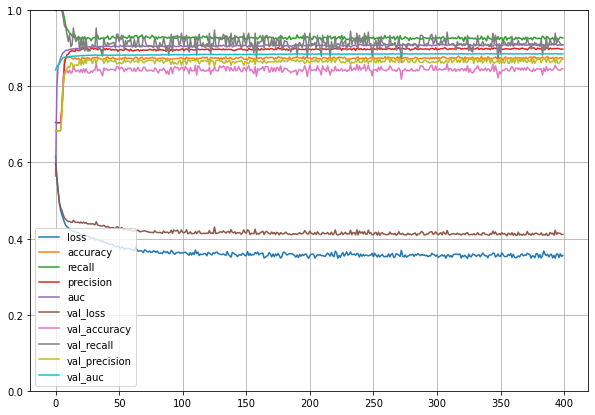

In [13]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()